In [56]:
import pandas as pd

from bs4 import BeautifulSoup
import requests
import re
import unicodedata

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

#### 2. Explain in detail the code below. In order to better understand the code, you may want to look at the following websites: ####

- https://www.crummy.com/software/BeautifulSoup/ 
- http://www.aivosto.com/vbtips/regex.html
- https://docs.python.org/2/library/re.html

In [19]:
attributes=['Crossing','Finishing','Heading Accuracy',
 'Short Passing','Volleys','Dribbling','Curve',
 'Free Kick Accuracy','Long Passing','Ball Control','Acceleration',
 'Sprint Speed','Agility','Reactions','Balance',
 'Shot Power','Jumping','Stamina','Strength',
 'Long Shots','Aggression','Interceptions','Positioning',
 'Vision','Penalties','Composure','Marking',
 'Standing Tackle','Sliding Tackle','GK Diving',
 'GK Handling','GK Kicking','GK Positioning','GK Reflexes']
 
links=[]   # get all Argentinian players
for offset in ['0','100','200']:
    page=requests.get('http://sofifa.com/players?na=52&offset='+offset) 
    soup=BeautifulSoup(page.content,'html.parser')
    for link in soup.find_all('a'):
        links.append(link.get('href'))
links=['http://sofifa.com'+l for l in links if 'player/'in l]  

# pattern for the regular expression 
pattern=r"""\s*([\w\s]*)"""   # file starts with empty spaces... players name...-other stuff     
for attr in attributes:
    pattern+=r""".*?(\d*\s*"""+attr+r""")"""  # for each attribute we have other stuff..number..attribute..other stuff
pat=re.compile(pattern, re.DOTALL)    # parsing multiline text

rows=[]
for j,link in enumerate(links):
    # print(j,link)   # comment out to suppress output
    row=[link]
    playerpage=requests.get(link)
    playersoup=BeautifulSoup(playerpage.content,'html.parser')
    text=playersoup.get_text()
    text=unicodedata.normalize('NFKD', text).encode('ascii','ignore')
    a=pat.match(text.decode())
    row.append(a.group(1))
    for i in range(2,len(attributes)+2):
        row.append(int(a.group(i).split()[0]))
    rows.append(row)
    # print(row[1])   # comment out to suppress output
df=pd.DataFrame(rows,columns=['link','name']+attributes)
df.to_csv('ArgentinaPlayers.csv',index=False)

The python script to extract player's informations is split into three main parts. One part that accesses the website and downloads links for each player, one part that creates the regular expression that matches a desired pattern, and the final part that combines both parts to extract the data. 

- attribute list: attributes to be extracted from a player's stats
- links list: stores all the extracted page links for each player
- inside for loop
    - the for loop loops through list ['0','100','200'] and adds each number to the url. Since each page displays 100 players we need to go to 200. The "requests.get" function creates a request object for each page
    - each page's content (html code) is downloaded and restored to readable html format by the "BeautifulSoup" function with the argument "html.parser"
    - the "find_all" function of the BeautifulSoup object is used to the content between tag "a"
    - the "href" tag is used to locate and extract all the links to websites in the downloaded html code
    - list comprehension to extract all the links that include "player/"
- create pattern for regular expression using the list of attributes created at the top

- loop thourhg the links extracted in the first part
    - does the same procedure as in the first step but with each players link
    - uses the regular expression to extract the player stats
    - uses another for loop to extract each matched item and saves it to a list
    - makes a dataframe out of the list and saves the file
    

#### 3. How would you change the code to download the first 500 English players instead?

In order to change the above code to download the first 500 English players we need to make the following alternations:

- extend the first for loop by '300' and '400' in order to get the first 500 and not 300 players
- change the url in the first loop to the one for English players
- change the filename the downloaded data is saved to

All the changes are marked with "###" in the code below.

In [17]:
attributes=['Crossing','Finishing','Heading Accuracy',
 'Short Passing','Volleys','Dribbling','Curve',
 'Free Kick Accuracy','Long Passing','Ball Control','Acceleration',
 'Sprint Speed','Agility','Reactions','Balance',
 'Shot Power','Jumping','Stamina','Strength',
 'Long Shots','Aggression','Interceptions','Positioning',
 'Vision','Penalties','Composure','Marking',
 'Standing Tackle','Sliding Tackle','GK Diving',
 'GK Handling','GK Kicking','GK Positioning','GK Reflexes']
 
links=[]   # get all English players
for offset in ['0','100','200','300','400']:   ###
    page=requests.get('http://sofifa.com/players?na=14&offset='+offset)   ###
    soup=BeautifulSoup(page.content,'html.parser')
    for link in soup.find_all('a'):
        links.append(link.get('href'))
links=['http://sofifa.com'+l for l in links if 'player/'in l]  

# pattern for the regular expression 
pattern=r"""\s*([\w\s]*)"""  
for attr in attributes:
    pattern+=r""".*?(\d*\s*"""+attr+r""")"""
pat=re.compile(pattern, re.DOTALL)

rows=[]
for j,link in enumerate(links):
    # print(j,link)   # comment out to suppress output
    row=[link]
    playerpage=requests.get(link)
    playersoup=BeautifulSoup(playerpage.content,'html.parser')
    text=playersoup.get_text()
    text=unicodedata.normalize('NFKD', text).encode('ascii','ignore')
    a=pat.match(text.decode())
    row.append(a.group(1))
    for i in range(2,len(attributes)+2):
        row.append(int(a.group(i).split()[0]))
    rows.append(row)
    # print(row[1])   # comment out to suppress output
df=pd.DataFrame(rows,columns=['link','name']+attributes)
df.to_csv('EnglishPlayers.csv',index=False)   ###

#### 4. Use the *sklearn.cluster.KMeans* Python class to cluster the players into 5 clusters.

We first read the extracted and use the "head" function to inspect the first five rows.

In [21]:
dataArg = pd.read_csv('ArgentinaPlayers.csv')
dataArg.head()

,link,name,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Free Kick Accuracy,...,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,http://sofifa.com/player/158023,Lionel Messi,77,95,71,88,85,97,89,90,...,74,94,13,28,26,6,11,15,14,8
1,http://sofifa.com/player/167664,Gonzalo Higuain,68,92,80,73,88,84,69,62,...,70,84,12,22,18,5,12,7,5,10
2,http://sofifa.com/player/153079,Sergio Aguero,70,90,68,79,85,89,82,72,...,80,90,13,20,12,13,15,6,11,14
3,http://sofifa.com/player/183898,Angel Di Maria,88,74,53,83,77,87,83,72,...,73,80,37,59,56,10,7,11,12,11
4,http://sofifa.com/player/211110,Paulo Dybala,78,89,65,80,86,91,86,82,...,82,82,14,20,20,5,4,4,5,8


As the first two columns of the data do not hold any useful information to cluster the data they will not be used.

In [47]:
cols = dataArg.columns[2:]
dataClean = dataArg[cols]

kmeans = KMeans(n_clusters=5, random_state=5).fit(dataArg[cols])

We then attach the labels for each cluster to the original data.

In [53]:
results = pd.concat([dataArg, pd.DataFrame(kmeans.labels_, columns= ['Cluster'])], axis=1)
results.head()

,link,name,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Free Kick Accuracy,...,Composure,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Cluster
0,http://sofifa.com/player/158023,Lionel Messi,77,95,71,88,85,97,89,90,...,94,13,28,26,6,11,15,14,8,0
1,http://sofifa.com/player/167664,Gonzalo Higuain,68,92,80,73,88,84,69,62,...,84,12,22,18,5,12,7,5,10,3
2,http://sofifa.com/player/153079,Sergio Aguero,70,90,68,79,85,89,82,72,...,90,13,20,12,13,15,6,11,14,0
3,http://sofifa.com/player/183898,Angel Di Maria,88,74,53,83,77,87,83,72,...,80,37,59,56,10,7,11,12,11,0
4,http://sofifa.com/player/211110,Paulo Dybala,78,89,65,80,86,91,86,82,...,82,14,20,20,5,4,4,5,8,0


Attempt at plotting the resulting clusters using the first ten attributes.

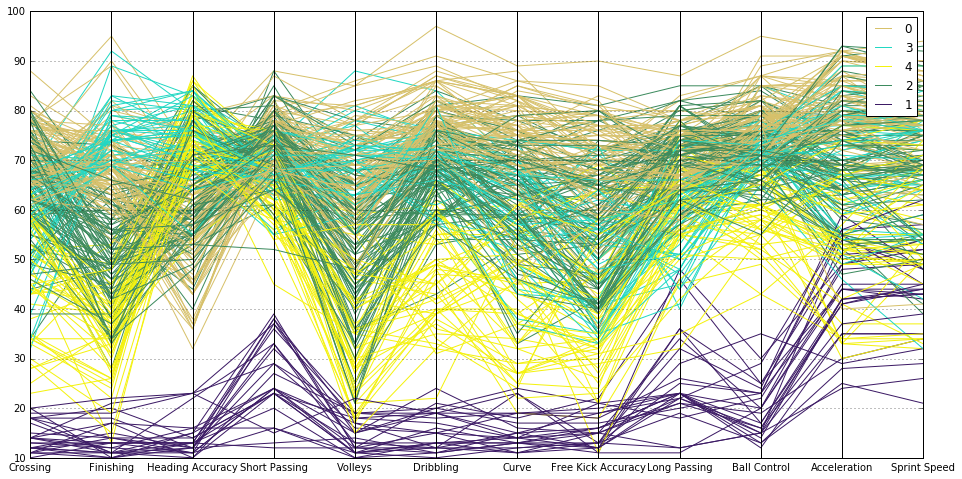

In [76]:
cols = results.columns[2:14]
dataPlot = results[cols]
dataPlot = pd.concat([dataPlot, results['Cluster']], axis=1)

plt.figure(figsize=(16,8))
parallel_coordinates(dataPlot, 'Cluster')

To get a better view of the different clusters we average the attributes for each cluster and draw the same plot.

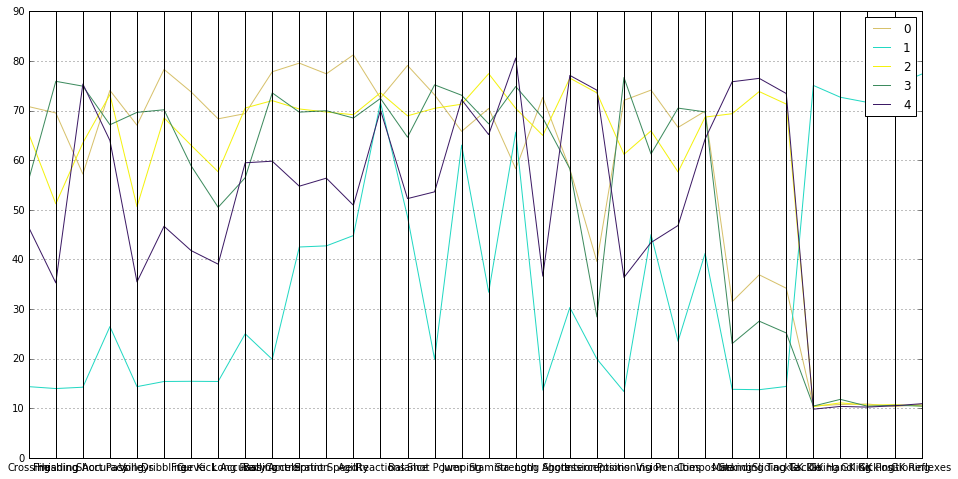

In [84]:
cols = results.columns[2:]
resultsNoName = results[cols]

groupedData = resultsNoName.groupby(resultsNoName['Cluster']).mean()
groupedData['Cluster'] = [0,1,2,3,4]

plt.figure(figsize=(16,8))
parallel_coordinates(groupedData, 'Cluster')

Plot the average of the twelve most important attributes for each cluster.

/Users/Steven/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


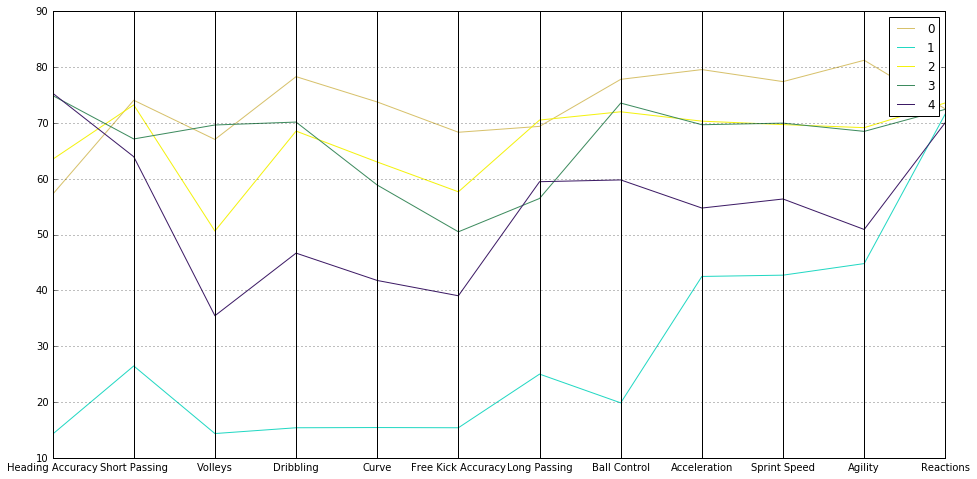

In [88]:
cols = groupedData.columns[2:14]
groupedDataImp = groupedData[cols]
groupedDataImp['Cluster'] = [0,1,2,3,4]

plt.figure(figsize=(16,8))
parallel_coordinates(groupedDataImp, 'Cluster')

#### 6. For a new and unknown player, the following attributes are available:

- Crossing: 45
- Sprint Speed: 40
- Long Shots: 35
- Aggression: 45
- Marking: 60
- Finishing: 40
- GK Handling: 15

For each of your 5 clusters from Step 4, compute
player to the nearest cluster based on the distance to the cluster centroids, using only the available attributes.

In [89]:
groupedDataImp.head()

,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Free Kick Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Cluster
Cluster,,,,,,,,,,,,,
0,57.208791,74.076923,67.054945,78.307692,73.769231,68.340659,69.395604,77.824176,79.571429,77.417582,81.241758,72.516484,0
1,14.230769,26.461538,14.346154,15.384615,15.423077,15.384615,25.000000,19.846154,42.500000,42.730769,44.807692,71.653846,1
2,63.483516,73.241758,50.637363,68.549451,63.010989,57.670330,70.527473,72.010989,70.329670,69.714286,69.164835,73.604396,2
3,74.928571,67.142857,69.642857,70.166667,58.880952,50.500000,56.476190,73.571429,69.690476,69.976190,68.500000,72.452381,3
4,75.360000,63.960000,35.460000,46.680000,41.780000,39.040000,59.480000,59.800000,54.760000,56.380000,50.920000,70.100000,4
